<a href="https://colab.research.google.com/github/sathishram12/scalerdsmlAssignments/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart
Evalution Criteria: 

1. Defining Problem Statement and Analyzing basic metrics (10 Points)
2. Missing Value & Outlier Detection (10 Points)
3. Business Insights based on Non- Graphical and Visual Analysis (10 Points)
4. Are women spending more money per transaction than men? Why or Why not? (10 Points)
5. Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
6. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)
7. Results when the same activity is performed for Married vs Unmarried (10 Points)
8. Results when the same activity is performed for Age (10 Points)
9. Final Insights (10 Points) - Illustrate the insights based on exploration and CLT
10. Recommendations (10 Points)


# Problem Statement

Analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.



In [ ]:
# !pip install pandas-profiling==3.1.0


In [ ]:
import pandas as pd 
pd.options.plotting.backend = "plotly"

import numpy as np
import missingno as msno
import pandas_profiling as pf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from scipy.stats import ttest_ind
%matplotlib inline

# Basic Metrics

## Size, shape and data types

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
display(df.head())
print()
print(f"Rows/columns dimension - {df.shape}")
print()
print("Data types and basic Information - ")
print(df.info())

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969



Rows/columns dimension - (550068, 10)

Data types and basic Information - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None


In [ ]:
df.isnull().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

We do not have any null values in our data set which makes it easier for us to conduct our data analysis.

## convert object data types to Categorical 

In [ ]:
df["Age"]=df["Age"].astype("category")
df["Gender"]=df["Gender"].astype("category")
df["City_Category"]=df["City_Category"].astype("category")
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype("category")
df["Product_Category"]=df["Product_Category"].astype("category")
df["Product_ID"]=df["Product_ID"].astype("category")
df["Marital_Status"]=df["Marital_Status"].astype("category")
df["User_ID"]=df["User_ID"].astype("category")
df["Occupation"]=df["Occupation"].astype("category")

## Summary

In [ ]:
df.describe(include="category").T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


# Univariate Analysis


## Gender

In [ ]:
df.groupby(['Gender'])['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [ ]:
df.groupby(['Gender'])['User_ID'].nunique().plot(kind='bar')

From given problem statements ,we get to know that we are having sample of dataof 50 million male customers and 50 million female customers. 
Lets find out how much percent of data

4225/50000000*100=0.0083

we have 0.008% male customers data  

## Purchase 

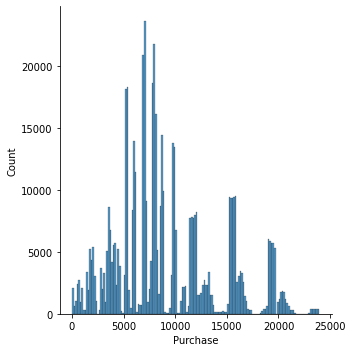

In [ ]:
sns.displot(df['Purchase'],kde_kws={"color": "k", "lw": 3, "label": "KDE"})

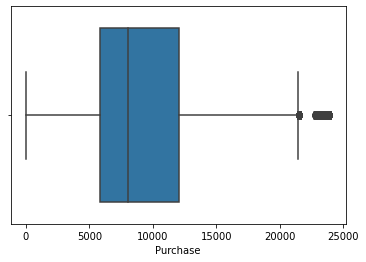

In [ ]:
sns.boxplot(x='Purchase', data=df)

Seems Like we have outlier and therfore we dont have normal distribution 

# Bivariate Analysis

## Gender vs Purchase

In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


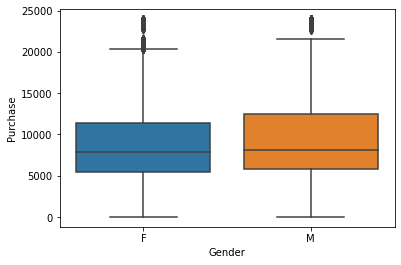

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df)

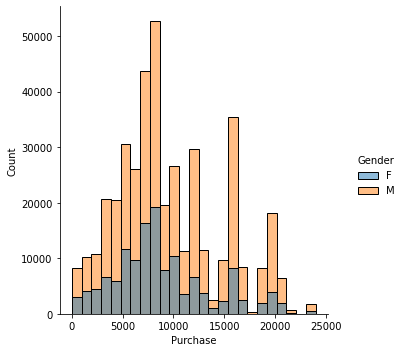

In [ ]:
sns.displot(x='Purchase',data=df, hue='Gender',bins=25)

With this Kde plot and non graphical analysis, we can say that male customer spending more money than female customers. However we are not sure about it, since sample is very less. Lets compute CLT over this dataset

In [ ]:
#Lets take 1000 times with a sample size 300
sample_size = 300
no_of_times = 1000
z_95 = 1.95
z_90 = 1.645
z_99 = 2.58

In [ ]:
male_expense_mean_list=[df[df['Gender']=='M']['Purchase'].sample(sample_size).mean() for i in range(0,no_of_times)]
female_expense_mean_list=[df[df['Gender']=='F']['Purchase'].sample(sample_size).mean() for i in range(0,no_of_times)]

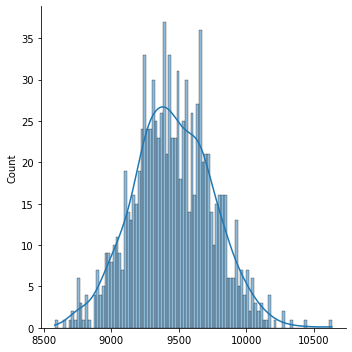

In [ ]:
sns.displot(male_expense_mean_list,bins=100, kde=True)

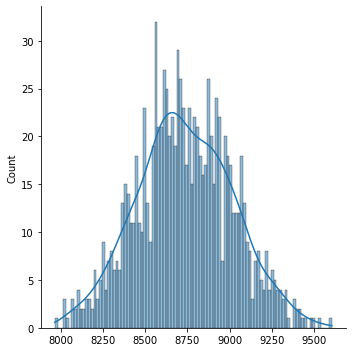

In [ ]:
sns.displot(female_expense_mean_list,bins=100, kde=True)

In [ ]:
mu1 = np.mean(male_expense_mean_list)
mu2 = np.mean(female_expense_mean_list)
std1 = np.std(male_expense_mean_list)
std2 = np.std(female_expense_mean_list)

mean_95_percent_ci =  {"Male":[np.round(mu1 - z_95 * std1/np.sqrt(no_of_times),2),
                        np.round(mu1 + z_95 * std1 / np.sqrt(no_of_times),2)], 
                       "Female":[np.round(mu2 - z_95 * std2 / np.sqrt(no_of_times),2), 
                       np.round(mu2 + z_95 * std2/np.sqrt(no_of_times),2)]}


mean_90_percent_ci =  {"Male":[np.round(mu1 - z_90 * std1/np.sqrt(no_of_times),2),
                        np.round(mu1 + z_90 * std1 / np.sqrt(no_of_times),2)], 
                       "Female":[np.round(mu2 - z_90 * std2 / np.sqrt(no_of_times),2), 
                       np.round(mu2 + z_90 * std2/np.sqrt(no_of_times),2)]}


mean_99_percent_ci =  {"Male":[np.round(mu1 - z_99 * std1/np.sqrt(no_of_times),2),
                        np.round(mu1 + z_99 * std1 / np.sqrt(no_of_times),2)], 
                       "Female":[np.round(mu2 - z_99 * std2 / np.sqrt(no_of_times),2), 
                       np.round(mu2 + z_99 * std2/np.sqrt(no_of_times),2)]}


print(mean_95_percent_ci)
print(mean_90_percent_ci)
print(mean_99_percent_ci)

{'Male': [9436.47, 9472.96], 'Female': [8716.99, 8751.85]}
{'Male': [9439.33, 9470.11], 'Female': [8719.72, 8749.12]}
{'Male': [9430.58, 9478.86], 'Female': [8711.36, 8757.48]}


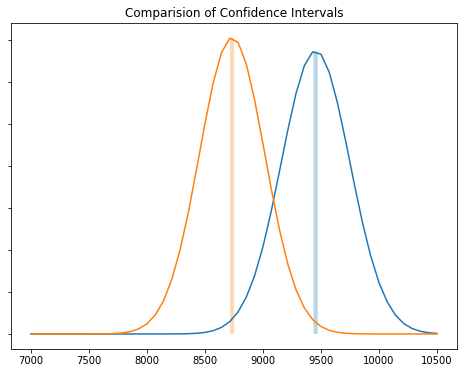

In [ ]:
#check if two ci are overlapping or not 
def returnNormalY(x, mu, sd):
    return 1/(sd * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sd**2))

# Generate Data for Plot
# Fill Section
x1 = np.linspace(mean_95_percent_ci['Male'][0], mean_95_percent_ci['Male'][1], 100)
y1 = returnNormalY(x1, mu1, std1)
x2 = np.linspace(mean_95_percent_ci['Female'][0],mean_95_percent_ci['Female'][1], 100)
y2 = returnNormalY(x2, mu2, std2)
# Line Section
x1_line = np.linspace(7000, 10500)
y1_line = returnNormalY(x1_line, mu1, std1)
x2_line = np.linspace(7000, 10500)
y2_line = returnNormalY(x2_line, mu2, std2)

# Generate Plot
fig, ax = plt.subplots()
ax.plot(x1_line, y1_line)
ax.plot(x2_line, y2_line)
ax.fill_between(x1, y1, alpha=0.3)
ax.fill_between(x2, y2, alpha=0.3)

# Plot Editing
fig.set_size_inches(8, 6, forward=False)
ax.set_yticklabels([])
plt.title("Comparision of Confidence Intervals")
plt.show()

Insights: 
- Estimated average purchase by male customers lies between 9390 to 9450
- Estimated average purchase by female customers lies between 8700 to 8760
- Since, confidence intervals for male customers and females customers are overlapping. There is no statistically significant difference between them.
- Therefore, we can say that there is no much difference between male customers and female customers. 

## Marital_status vs Purchase

In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


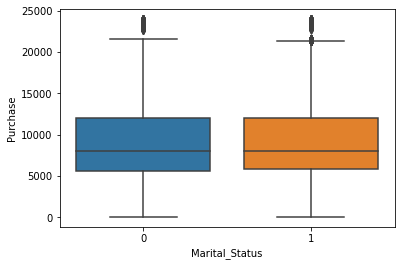

In [ ]:
sns.boxplot(x='Marital_Status', y='Purchase', data=df)

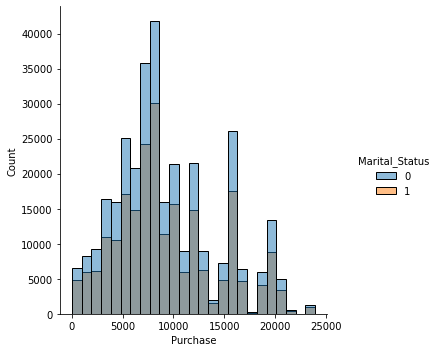

In [ ]:
sns.displot(x='Purchase',data=df, hue='Marital_Status',bins=25)

With this Kde plot and non graphical analysis, we can say that unmarried customer spending more money than married customers. However we are not sure about it, since sample is very less. Lets compute CLT over this dataset

In [ ]:
married_expense_mean_list=[df[df['Marital_Status']==0]['Purchase'].sample(sample_size).mean() for i in range(0,no_of_times)]
unmarried_expense_mean_list=[df[df['Marital_Status']==1]['Purchase'].sample(sample_size).mean() for i in range(0,no_of_times)]

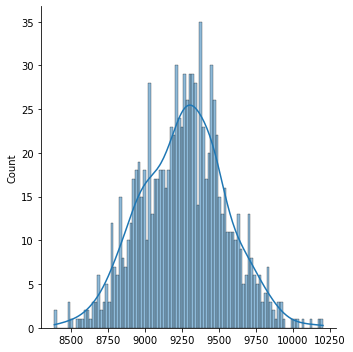

In [ ]:
sns.displot(married_expense_mean_list,bins=100, kde=True)

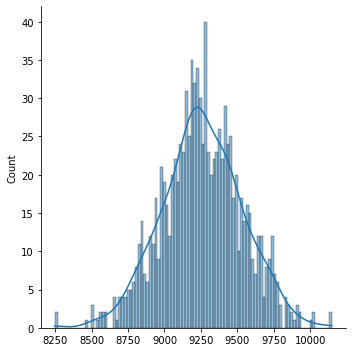

In [ ]:
sns.displot(unmarried_expense_mean_list,bins=100, kde=True)

In [ ]:
mu1 = np.mean(married_expense_mean_list)
mu2 = np.mean(unmarried_expense_mean_list)
std1 = np.std(married_expense_mean_list)
std2 = np.std(married_expense_mean_list)

mean_95_percent_ci =  {"Married":[np.round(mu1 - z_95 * std1/np.sqrt(no_of_times),2),
                        np.round(mu1 + z_95 * std1 / np.sqrt(no_of_times),2)], 
                       "Unmarried":[np.round(mu2 - z_95 * std2 / np.sqrt(no_of_times),2), 
                       np.round(mu2 + z_95 * std2/np.sqrt(no_of_times),2)]}


print(mean_95_percent_ci)

{'Married': [9244.07, 9279.58], 'Unmarried': [9240.24, 9275.75]}


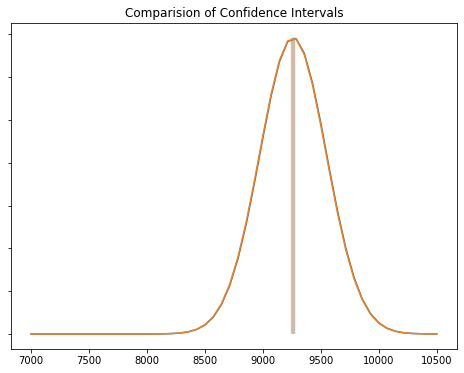

In [ ]:
# Generate Data for Plot
# Fill Section
x1 = np.linspace(mean_95_percent_ci['Married'][0], mean_95_percent_ci['Married'][1], 100)
y1 = returnNormalY(x1, mu1, std1)
x2 = np.linspace(mean_95_percent_ci['Unmarried'][0],mean_95_percent_ci['Unmarried'][1], 100)
y2 = returnNormalY(x2, mu2, std2)
# Line Section
x1_line = np.linspace(7000, 10500)
y1_line = returnNormalY(x1_line, mu1, std1)
x2_line = np.linspace(7000, 10500)
y2_line = returnNormalY(x2_line, mu2, std2)

# Generate Plot
fig, ax = plt.subplots()
ax.plot(x1_line, y1_line)
ax.plot(x2_line, y2_line)
ax.fill_between(x1, y1, alpha=0.3)
ax.fill_between(x2, y2, alpha=0.3)

# Plot Editing
fig.set_size_inches(8, 6, forward=False)
ax.set_yticklabels([])
plt.title("Comparision of Confidence Intervals")
plt.show()

In [ ]:
male_df = df[df['Gender']=='M']
female_df = df[df['Gender']=='F']

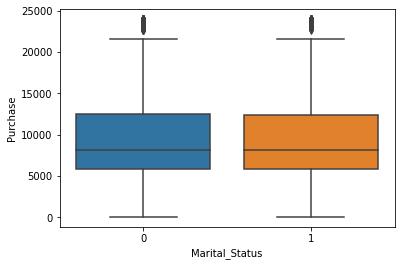

In [ ]:
sns.boxplot(x='Marital_Status', y='Purchase', data=male_df)

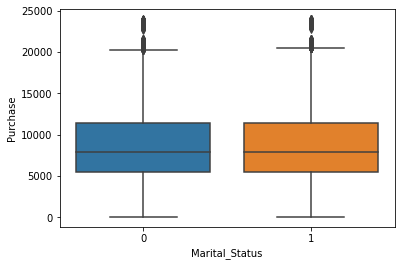

In [ ]:
sns.boxplot(x='Marital_Status', y='Purchase', data=female_df)

Insights: 
- Estimated average purchase by married customers lies between 9300 to 9400
- Estimated average purchase by unmarried customers lies between 9300 to 9400
- Since, confidence intervals for married customers and unmarried customers are same. There is no statistically significant difference between them.
- Therefore, we can say that there is no much difference between married customers and unmarried customers. 

## Age vs Purchase

In [ ]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


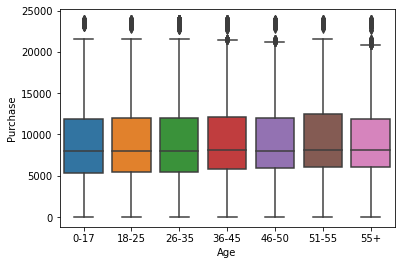

In [ ]:
sns.boxplot(x='Age', y='Purchase', data=df)

With this Kde plot and non graphical analysis, we can say that unmarried customer spending more money than married customers. However we are not sure about it, since sample is very less. Lets compute CLT over this dataset

In [ ]:
#Lets take 1000 times with a sample size 300
sample_size = 300
no_of_times = 1000
z_95 = 1.95
z_90 = 1.645
z_99 = 2.58

In [ ]:
expense_mean_list_0_17=[df[df['Age']=="0-17"]['Purchase'].sample(sample_size).mean() for i in range(0,no_of_times)]
expense_mean_list_18_25=[df[df['Age']=="18-25"]['Purchase'].sample(sample_size).mean() for i in range(0,no_of_times)]
expense_mean_list_26_35=[df[df['Age']=="26-35"]['Purchase'].sample(sample_size).mean() for i in range(0,no_of_times)]
expense_mean_list_36_45=[df[df['Age']=="36-45"]['Purchase'].sample(sample_size).mean() for i in range(0,no_of_times)]
expense_mean_list_46_50=[df[df['Age']=="46-50"]['Purchase'].sample(sample_size).mean() for i in range(0,no_of_times)]
expense_mean_list_51_55=[df[df['Age']=="51-55"]['Purchase'].sample(sample_size).mean() for i in range(0,no_of_times)]
expense_mean_list_51_plus=[df[df['Age']=="55+"]['Purchase'].sample(sample_size).mean() for i in range(0,no_of_times)]

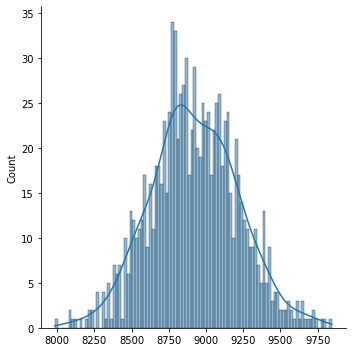

In [ ]:
sns.displot(expense_mean_list_0_17,bins=100, kde=True)

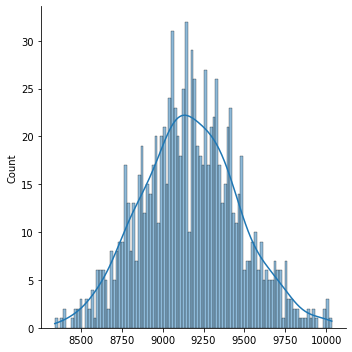

In [ ]:
sns.displot(expense_mean_list_18_25,bins=100, kde=True)

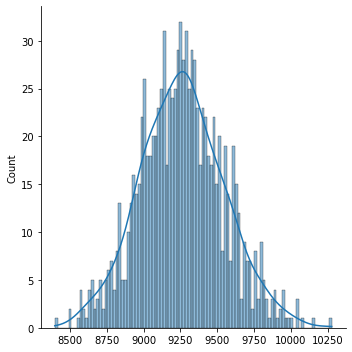

In [ ]:
sns.displot(expense_mean_list_26_35,bins=100, kde=True)

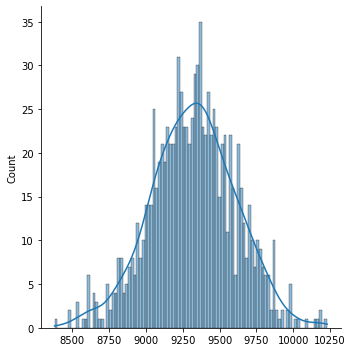

In [ ]:
sns.displot(expense_mean_list_36_45,bins=100, kde=True)

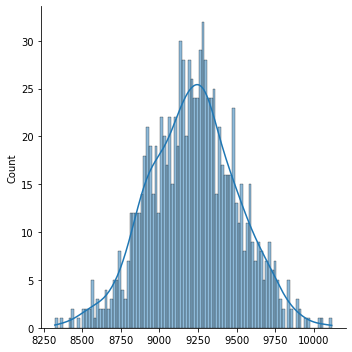

In [ ]:
sns.displot(expense_mean_list_46_50,bins=100, kde=True)

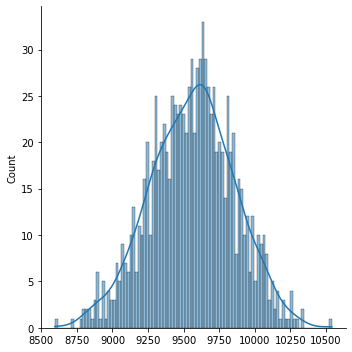

In [ ]:
sns.displot(expense_mean_list_51_55,bins=100, kde=True)

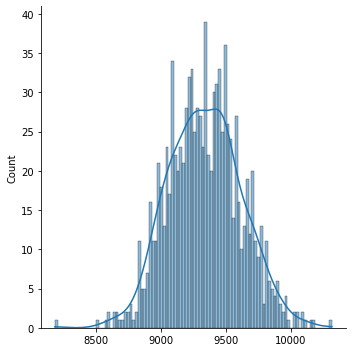

In [ ]:
expense_mean_list_51_plus
sns.displot(expense_mean_list_51_plus,bins=100, kde=True)

Insights:

- There is no much difference between age on purchase.

# Recommendations

Our insights show that Almost every category of customers' average purchasing products is lies between 8500 to 9500. 
we can provide customer offers and check again if there is an increase in purchasing or not
